<a href="https://colab.research.google.com/github/iiTsSUgar/UAS-ARTFICIAL-INTELEGENCE/blob/main/UAS_AI_MBKM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd
import os

In [ ]:
path = kagglehub.dataset_download("anandshaw2001/netflix-movies-and-tv-shows")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/anandshaw2001/netflix-movies-and-tv-shows/versions/1


In [ ]:
file_path = os.path.join(path, 'netflix_titles.csv')
df_clean = pd.read_csv(file_path)
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Pilih fitur yang relevan untuk clustering
df_clean = df_clean[['release_year', 'rating', 'duration']].copy()

# Ubah rating ke kategori numerik
df_clean['rating'].fillna('Unknown')  # Gantilah nilai NaN dengan 'Unknown'
label_encoder = LabelEncoder()
df_clean.loc[:, 'rating'] = df_clean['rating'].fillna('Unknown')

# Ubah durasi ke angka (menghapus teks "min" atau "Season")
df_clean['duration'] = df_clean['duration'].astype(str).str.extract('(\d+)').astype(float)

# Hilangkan missing values
df_clean.dropna(inplace=True)

# Tampilkan hasil preprocessing
df_clean.head()

,release_year,rating,duration
0,2020,PG-13,90.0
1,2021,TV-MA,2.0
2,2021,TV-MA,1.0
3,2021,TV-MA,1.0
4,2021,TV-MA,2.0


Path to dataset files: /root/.cache/kagglehub/datasets/anandshaw2001/netflix-movies-and-tv-shows/versions/1


<ipython-input-41-b7d8c3c27a62>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['rating'].fillna('Unknown', inplace=True)


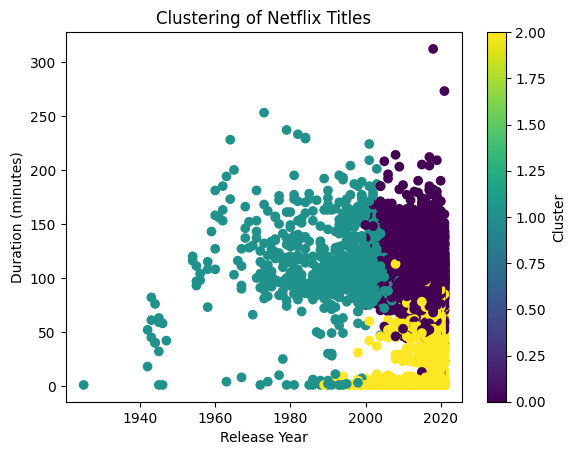

Mean Squared Error: 649.9571859414807
R² Score: 0.7477352934182546


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Langkah 1: Load dan Preprocessing Data
path = kagglehub.dataset_download("anandshaw2001/netflix-movies-and-tv-shows")

print("Path to dataset files:", path)
df = pd.read_csv(file_path)

# Pilih fitur relevan
df_clean = df[['release_year', 'rating', 'duration']].copy()

# Ubah rating ke kategori numerik
df_clean['rating'].fillna('Unknown', inplace=True)
label_encoder = LabelEncoder()
df_clean['rating'] = label_encoder.fit_transform(df_clean['rating'])

# Ubah durasi ke angka (menghapus teks "min" atau "Season")
df_clean['duration'] = df_clean['duration'].astype(str).str.extract('(\d+)').astype(float)

# Hilangkan missing values
df_clean.dropna(inplace=True)

# Normalisasi fitur
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean[['release_year', 'rating', 'duration']])

# Langkah 2: Clustering dengan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(df_scaled)

# Visualisasi hasil clustering
plt.scatter(df_clean['release_year'], df_clean['duration'], c=df_clean['cluster'], cmap='viridis')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.title('Clustering of Netflix Titles')
plt.colorbar(label='Cluster')
plt.show()

# Langkah 3: Machine Learning (Regresi)
X = df_clean[['release_year', 'rating', 'cluster']]
y = df_clean['duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dan Evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
